# BSO Demo: Graph Coloring with Bee Swarm Optimization (New Implementation)

This notebook demonstrates running the updated BSOColoring implementation on a DIMACS‐style benchmark graph and visualizing the results.


In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('../src'))  # adjust if needed

from bso_coloring import BSOColoring
import networkx as nx
import matplotlib.pyplot as plt
import random

%matplotlib inline


In [2]:
def load_graph(path):
    G = nx.Graph()
    with open(path) as f:
        for line in f:
            parts = line.split()
            if not parts:
                continue
            if parts[0] == 'p':
                n = int(parts[1])
                G.add_nodes_from(range(1, n+1))
            elif parts[0] == 'e':
                u, v = map(int, parts[1:])
                G.add_edge(u, v)
    return G


In [3]:
# Choose your graph path
graph_path = '../data/benchmarks/test1.txt'
#graph_path = '../data/benchmarks/test2.txt'  # Uncomment to test with another graph
#graph_path = '../data/benchmarks/test3.txt'  # Uncomment to test with another graph
#graph_path = '../data/benchmarks/test4.txt'  # Uncomment to test with another graph
#graph_path = '../data/benchmarks/test_small20.txt'  # Uncomment to test with another graph
#graph_path = '../data/benchmarks/test_medium40.txt'  # Uncomment to test with another graph
G = load_graph(graph_path)
print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Loaded graph with 138 nodes and 493 edges.


In [4]:
print(len(G))

138


In [5]:
# Instantiate and run the BSOColoring solver

solver = BSOColoring(
    G,
    k_max=None,
    n_bees=20,
    n_chance=2,
    max_iter=100,
    max_steps=10,
    flip=5,
    seed=42,
)

best_coloring, fitness = solver.run()

print(f"Best coloring: {best_coloring}")
print(f"Best fitness: {fitness[0]}  (Conflicts: {fitness[2]}, Colors used: {fitness[1]})")


kmax:  12
the bounds are:  36 12
Best coloring: [11, 2, 5, 12, 5, 4, 6, 3, 12, 2, 11, 11, 8, 2, 8, 6, 1, 10, 6, 4, 12, 6, 2, 1, 9, 4, 12, 9, 3, 9, 6, 4, 3, 9, 8, 2, 3, 10, 7, 8, 5, 6, 5, 7, 5, 11, 9, 7, 10, 6, 5, 5, 2, 9, 8, 9, 2, 10, 11, 4, 2, 11, 5, 6, 10, 4, 12, 9, 1, 7, 7, 5, 10, 8, 11, 7, 11, 9, 11, 6, 3, 6, 9, 4, 6, 5, 12, 7, 11, 3, 12, 11, 10, 1, 12, 3, 3, 8, 11, 8, 8, 9, 4, 4, 11, 6, 1, 4, 1, 6, 7, 7, 8, 4, 8, 9, 6, 12, 11, 8, 12, 7, 3, 10, 5, 2, 4, 11, 10, 12, 8, 12, 3, 8, 5, 7, 6, 1]
Best fitness: 12  (Conflicts: 0, Colors used: 12)


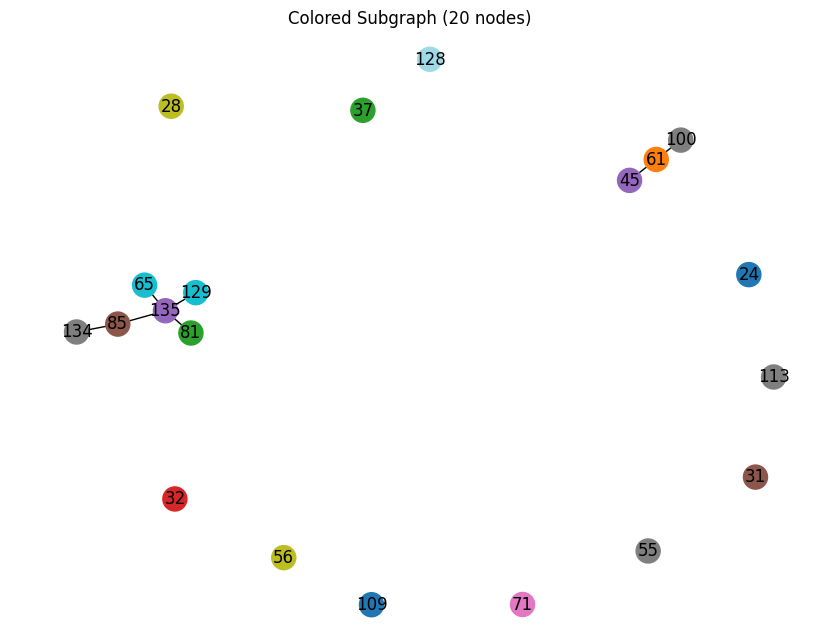

In [6]:
# Visualize a random subgraph of 20 nodes
nodes = random.sample(list(G.nodes()), 20)
subG = G.subgraph(nodes)
pos = nx.spring_layout(subG, seed=42)
colors = [best_coloring[node-1] for node in subG.nodes()]

plt.figure(figsize=(8,6))
nx.draw(subG, pos,
        with_labels=True,
        node_color=colors,
        cmap=plt.cm.tab20,
        node_size=300)
plt.title("Colored Subgraph (20 nodes)")
plt.show()


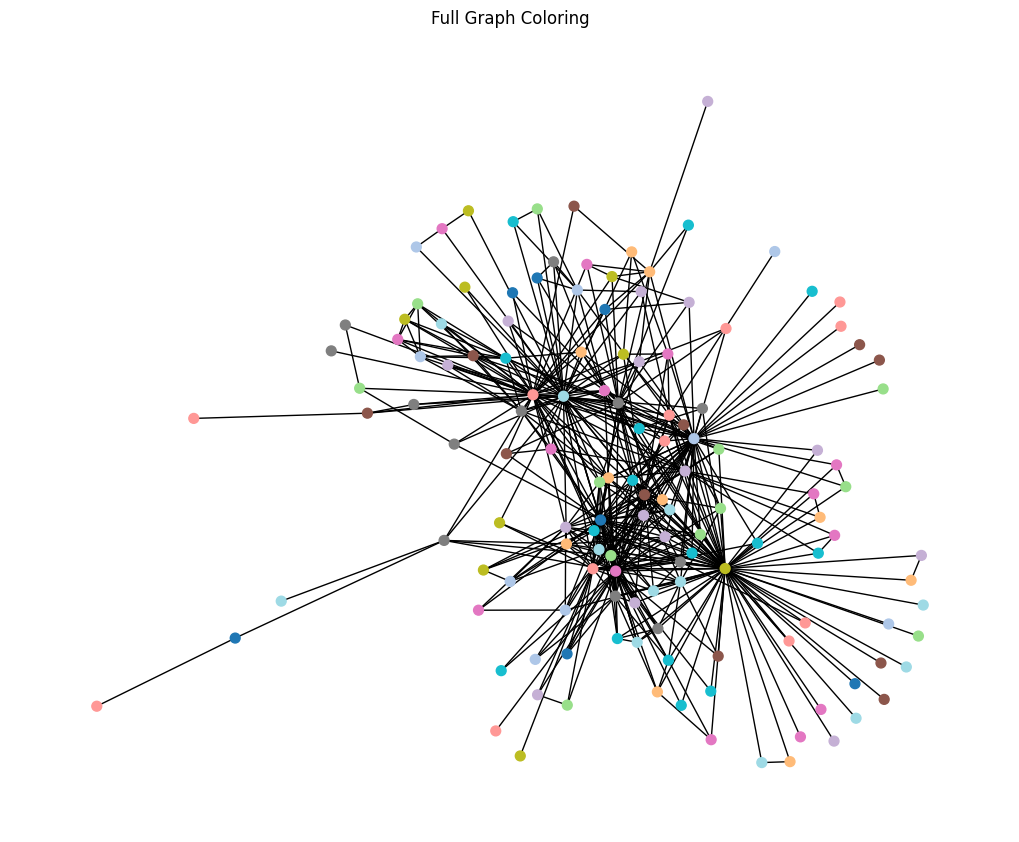

In [7]:
# Visualize full graph coloring
pos_full = nx.spring_layout(G, seed=42)
colors_full = [best_coloring[node-1] for node in G.nodes()]

plt.figure(figsize=(10,8))
nx.draw(G, pos_full,
        with_labels=False,
        node_color=colors_full,
        cmap=plt.cm.tab20,
        node_size=50)
plt.title("Full Graph Coloring")
plt.show()
